<center>

# Atividade PAA - Avaliação experimental

</center>

Henricky de Lima Monteiro - 475075

In [36]:
import numpy as np
import matplotlib.pyplot as plt
# from typing import List
from random import seed,randint
from sklearn.linear_model import LinearRegression
from time import time

In [2]:
def GenerateData(lenghts):
    seed(42)
    return [ [ randint(0,100) for j in range(len)] for len in lenghts]

In [3]:
def bubleSort(A):
    for i in range(len(A)-1):
        for j in range(len(A)-1):
            if(A[j]>A[j+1]):
                aux = A[j]
                A[j]=A[j+1]
                A[j+1]=aux

In [4]:
def mergeSort(A):
    if(len(A)>1):
        mid = len(A)//2
        left = A[:mid]
        right = A[mid:]
        mergeSort(left)
        mergeSort(right)
        i=0
        j=0
        k=0
        while(i<len(left) and j<len(right)):
            if(left[i]<right[j]):
                A[k] = left[i]
                i+=1
            else:
                A[k]=right[j]
                j+=1
            k+=1
        while(i< len(left)):
            A[k]=left[i]
            i+=1
            k+=1
        while(j< len(right)):
            A[k]=right[j]
            j+=1
            k+=1

In [5]:
def recursive(n):
    if(n<=1): return 1
    else: return recursive(n-1)+recursive(n-1)

In [79]:
def GenerateDataByMethod(lenghts, n, method, name, inputTypeArray=True):
    f = open("{0}.txt".format(name),"w")
    for l in lenghts:
        res = 0
        for i in range(n):
            if(inputTypeArray):
                v = l.copy()
                ini = time()
                method(v)
                fin = time()
                res += fin-ini
            else:
                ini = time()
                method(l)
                fin = time()
                res += fin-ini
        res = (res/n)*1000
        param = len(l) if inputTypeArray else l
        print('close len {l} in {name} in {s: .3f}ms'.format(l= param,s=res,name=name))
        f.write("{l} {t:.3f}\n".format(l = param, t= res))
    f.close()

In [7]:
# lenghts = GenerateData([10,100,1000,2000,3000, 5000, 8000, 10000])
# n = 5
# GenerateDataByMethod(lenghts,n, bubleSort, 'bubleSort')
# lenghts = lenghts+ GenerateData([15000,20000,25000,30000,35000,40000])
# GenerateDataByMethod(lenghts,n, mergeSort, 'mergeSort')
# inputs = [i for i in range(12,28,2)]
# GenerateDataByMethod(inputs,n, recursive, 'recursive',inputTypeArray=False)



## Gerando os gráficos

In [81]:
def DrawGraphic(file, color='b'):
    title = file.replace('.txt','')
    A = np.loadtxt(file)
    x = [i[0] for i in A]
    y = [i[1] for i in A]
    plt.plot(x,y, 'o:',color=color, label=title)
    plt.title(title,fontweight='bold')
    plt.xlabel("Tamanho N")
    plt.ylabel('T(N) (ms)')
    plt.legend()
    plt.show()

def DrawLogGraphic(file, color='b'):
    title = 'log '+file.replace('.txt','')
    A = np.loadtxt(file)
    x = [i[0] for i in A]
    lx = np.log2(x)
    y = [i[1] for i in A]
    ly = np.log2(y)

    plt.plot(lx,ly, 'o:',color=color, label=title)
    plt.title(title,fontweight='bold')
    plt.xlabel(r"$\log{N}$")
    plt.ylabel(r"$\log{T(N)}$")
    model = LinearRegression().fit(lx.reshape(-1,1),ly)
    print('slope:', model.coef_)
    plt.plot(lx, model.intercept_+model.coef_*lx, 'r', label="{a}x^2+{b}".format(b=model.intercept_,a=model.coef_))
    plt.legend()
    plt.show()
    return lambda x: model.intercept_+model.coef_*x
    

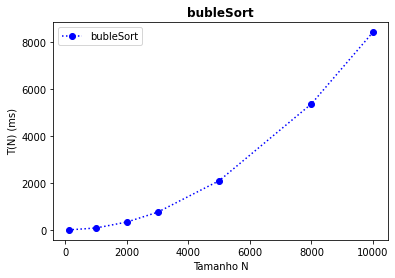

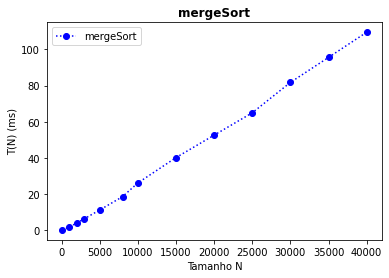

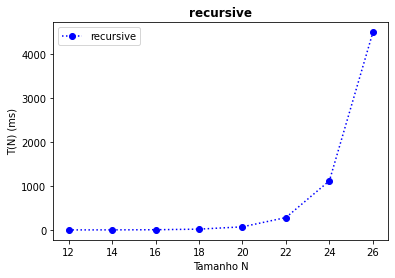

In [82]:
DrawGraphic('bubleSort.txt')
DrawGraphic('mergeSort.txt')
DrawGraphic('recursive.txt')


slope: [2.04061233]


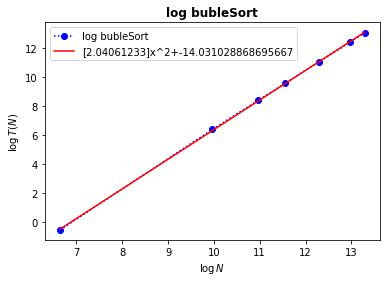

slope: [1.07377794]


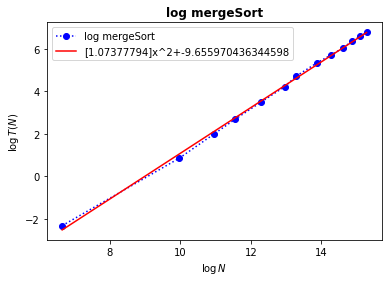

slope: [12.76798458]


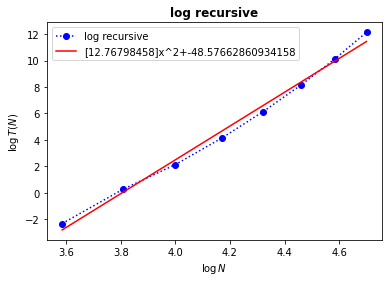

<function __main__.DrawLogGraphic.<locals>.<lambda>(x)>

In [83]:
FBuble = DrawLogGraphic('bubleSort.txt')
FMerge = DrawLogGraphic('mergeSort.txt')
DrawLogGraphic('recursive.txt')

In [84]:
def RazaoDobrando(method):
    N = 25
    prev = 0
    while(True):
        a = [randint(-N,N) for i in range(N)]
        ini = time()
        method(a)
        fin = time()

        t = fin - ini
        if(prev>0): print(t/prev)

        prev =t
        N = 2*N

In [20]:
RazaoDobrando(bubleSort)


2.9617202268431
4.021700973352481
4.492263132836058
4.222843415207158
3.9563898829380726
4.067672988690772
4.302464125058466
4.523606225845223
4.4485859334708655
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\henri\AppData\Local\Temp\ipykernel_22856\1766459443.py", line 1, in <cell line: 1>
    RazaoDobrando(bubleSort,"BubleSort")
  File "C:\Users\henri\AppData\Local\Temp\ipykernel_22856\3962936536.py", line 7, in RazaoDobrando
    method(a)
  File "C:\Users\henri\AppData\Local\Temp\ipykernel_22856\255310108.py", line -1, in bubleSort
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 1992, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Python310\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\Python310\lib\site-packages\IPyth

In [21]:
RazaoDobrando(mergeSort)


1.0162213740458015
1.9647887323943662
2.0041816009557945
1.7495678092399405
2.4320079048689904
2.056460764672093
2.057363200348812
2.18067936474297
2.235665617374218
2.1224032499407377
2.174511169988578
2.1481418416001956
2.1448230314187184
2.1457192011036996


KeyboardInterrupt: 

In [87]:
def Estimando(method,N, name):
    a = [randint(-N,N) for i in range(N)]
    ini = time()
    method(a)
    fin = time()
    t = (fin - ini)*1000
    print("{name} T({n}) = {t}".format(name=name,n=N, t=t))
    return t
   

In [92]:
t1 = Estimando(bubleSort, 25*(2**10),'BubleSort')
print(np.log2(t1))

BubleSort T(25600) = 70216.60256385803
16.099524572537547


In [93]:
t2 = Estimando(mergeSort,25*(2**13),'MergeSort')
print(np.log2(t2))

MergeSort T(204800) = 747.9941844940186
9.5468832432643


In [96]:
r1 = FBuble(np.log2(25*(2**10)))
r2 = FMerge(np.log2(25*(2**13)))
print(r1,r2)


[15.8514046] [9.2896132]


In [99]:
#erro relativo 
Erro  = lambda tm,tp: 100*np.absolute(tm - tp)/tp
e1 = Erro(np.log2(t1),r1)
e2 = Erro(np.log2(t2),r2)
print(e1,e2)


[1.56528701] [2.76943758]
